In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from numpy import mean

[1716494, 6718393, 1534954, 28432, 1528, 158, 25, 16] 10000000
[66359, 267511, 71720, 1798, 130, 24, 7, 4] 407553


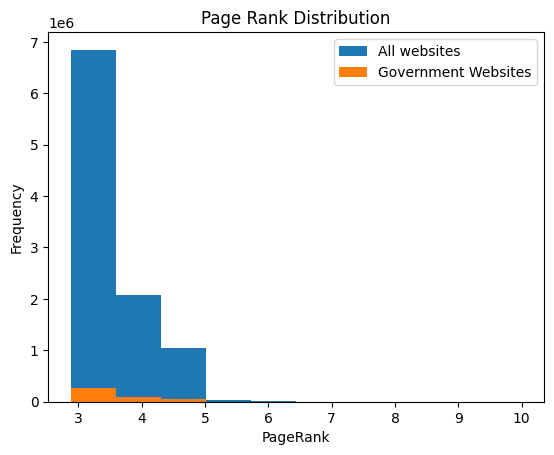

In [43]:
df = pd.read_csv('top10milliondomains.csv')
ax = df['Open Page Rank'].plot.hist(label = "All websites")
dist_list = []
for i in range(2,10):
    dist_list.append(len(df.query('`Open Page Rank` > @i and `Open Page Rank` <= (@i +1)')))
print(dist_list, sum(dist_list)) # distributions from 2 to 3, 3 to 4, etc
# now do government websites
government_domains = ['.gov', '.gv', '.gob','.gc','.gouv','.go.','.govt', '.admin.ch','.government','.gub','.mil']
contain_government = df[df['Domain'].str.contains('.gov|.gv|.gob|.gc|.gouv|.go.|.govt|.admin.ch|.government|.gub|.mil')]
contain_government['Open Page Rank'].plot.hist(label = "Government Websites")
gov_dist_list = []
for i in range(2,10):
    gov_dist_list.append(len(contain_government.query('`Open Page Rank` > @i and `Open Page Rank` <= (@i +1)')))
print(gov_dist_list, sum(gov_dist_list)) # distributions from 2 to 3, 3 to 4, etc
ax.set_title("Page Rank Distribution")
ax.set_xlabel("PageRank")
ax.set_ylabel("Frequency")
ax.legend()

Amount in each sample: 
government: 93
non-government: 94
high PageRank: 99
low PageRank: 92

Mean A3 value of high PageRank: 0.25552803192206663 
Mean A3 value of low PageRank: 0.22538078992655514
TtestResult(statistic=0.9107715583161649, pvalue=0.3635758609276226, df=189.0)
Mean PageRank of government: 4.638172043010753 
Mean PageRank of non government: 4.502234042553191
Mean A3 value of government: 0.3402085480134785 
Mean A3 value of non government: 0.20179729350731263
TtestResult(statistic=3.790505729903285, pvalue=0.0002033163520633786, df=185.0)
TtestResult(statistic=3.790505729903285, pvalue=0.0001016581760316893, df=185.0)
TtestResult(statistic=3.989615770215116, pvalue=9.52663539756633e-05, df=185.0)
TtestResult(statistic=3.989615770215116, pvalue=4.763317698783165e-05, df=185.0)


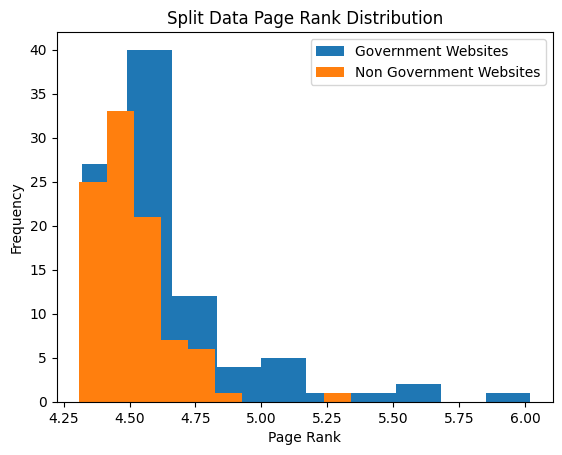

In [44]:
gov_df = pd.read_csv('results/A3_government_results.csv')
non_gov_df = pd.read_csv('results/A3_non_government_results.csv')
high_df = pd.read_csv('results/A3_high_pagerank_results.csv')
low_df = pd.read_csv('results/A3_low_pagerank_results.csv')

print(f"Amount in each sample: \ngovernment: {len(gov_df)}\nnon-government: {len(non_gov_df)}\nhigh PageRank: {len(high_df)}\nlow PageRank: {len(low_df)}\n")

# NULL hypo, there is no difference between accessibility between high popularity and low popularity
print(f"Mean A3 value of high PageRank: {mean(high_df['A3 Value'])} \nMean A3 value of low PageRank: {mean(low_df['A3 Value'])}")
print(ttest_ind(high_df['A3 Value'], low_df['A3 Value']))
# Cannot REJECT since p>0.05
# means there is no statistical evidence to conclude that high popularity are more accessible. 
# Essentially this says that this result may have happened due to random chance

# NULL hypo, there is no difference between accessibility between gov/non-gov
print(f"Mean PageRank of government: {mean(gov_df['PageRank'])} \nMean PageRank of non government: {mean(non_gov_df['PageRank'])}")
print(f"Mean A3 value of government: {mean(gov_df['A3 Value'])} \nMean A3 value of non government: {mean(non_gov_df['A3 Value'])}")
print(ttest_ind(gov_df['A3 Value'], non_gov_df['A3 Value']))
# REJECT p<0.05 so there is a statistical difference
# Hypo 1 = gov is higher than non gov
print(ttest_ind(gov_df['A3 Value'], non_gov_df['A3 Value'], alternative = 'greater'))
# ACCEPT p<0.025 so there is a statistical difference

# is there a statistical difference between the samples taken in gov/non-gov for PageRank?
# NULL hypo there is no difference in PageRank for records in government and non gov domains in samples
print(ttest_ind(gov_df['PageRank'], non_gov_df['PageRank']))
# REJECT, there is a difference.
# H1 PageRanks for gov are higher (more popular)
print(ttest_ind(gov_df['PageRank'], non_gov_df['PageRank'], alternative = 'greater'))
# ACCEPT, PageRanks for gov are higher. Due to previous results this SHOULD NOT make a statistical difference
ax = gov_df['PageRank'].plot.hist(label = "Government Websites")
non_gov_df['PageRank'].plot.hist(label = "Non Government Websites")

ax.set_title("Split Data Page Rank Distribution")
ax.set_xlabel("Page Rank")
ax.set_ylabel("Frequency")
ax.legend()

# Something seems fishy. Sampling and perhaps error in A3 value calculation is throwing off results
# explore in discussion